In [1]:
import pandas as pd

In [2]:

# Crear una serie de ejemplo
s = pd.Series([1, 2, 3, 4, 5, 5, 3, 2, 1, None])

# Aplicar funciones de agregación con .agg
result = s.agg(['count', 'mean', 'median', 'max', 'min', 'nunique'])
print(result)

count      9.000000
mean       2.888889
median     3.000000
max        5.000000
min        1.000000
nunique    5.000000
dtype: float64


In [3]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 5, 3, 2, 1, None],
    'B': [10, 15, 10, 20, 25, 30, 25, 20, 10, 15]
})

# Agregaciones múltiples por columna
agg_result = df.agg({
    'A': ['count', 'mean', 'nunique'],
    'B': ['max', 'min', 'median']
})
print(agg_result)


                A     B
count    9.000000   NaN
mean     2.888889   NaN
nunique  5.000000   NaN
max           NaN  30.0
min           NaN  10.0
median        NaN  17.5


In [4]:
import pandas as pd

# Datos de ejemplo
df = pd.DataFrame({
    'Grupo': ['A', 'A', 'B', 'B', 'B', 'C', 'C'],
    'Valor': [10, 15, 10, 20, 25, 30, 30],
    'Peso': [1.1, 1.2, 1.5, 2.0, 2.1, 2.5, 2.5]
})

# Agregación con funciones estándar + lambda para mad
resultado = df.groupby('Grupo').agg(
    valor_count=('Valor', 'count'),     # cuenta el número de elementos en cada grupo en la columna 'Valor'
    valor_median=('Valor', 'median'),  # calcula la mediana de los valores en la columna 'Valor' por grupo
    
    # calcula la desviación absoluta media de los valores en la columna 'Peso' por grupo.
    # Este es un cálculo personalizado con una función lambda:
    # (x - x.mean()) calcula la diferencia de cada valor respecto a la media,
    # abs() toma el valor absoluto de esas diferencias, 
    # y mean() calcula la media de esas diferencias (esto es como .mad() en estadísticas).
    peso_desv_abs=('Peso', lambda x: (x - x.mean()).abs().mean()),  # equivalente a .mad() 
    # calcula el valor mínimo en la columna 'Peso' por grupo
    valor_minimo = ('Peso', 'min'),
    # verifica si todos los valores en la columna 'Peso' son verdaderos (distintos de cero).
    # 'all' devuelve True si todos los valores no son cero o NaN, de lo contrario False.
    tipo = ('Peso', 'all'),
)

print(resultado)


       valor_count  valor_median  peso_desv_abs  valor_minimo  tipo
Grupo                                                              
A                2          12.5       0.050000           1.1  True
B                3          20.0       0.244444           1.5  True
C                2          30.0       0.000000           2.5  True


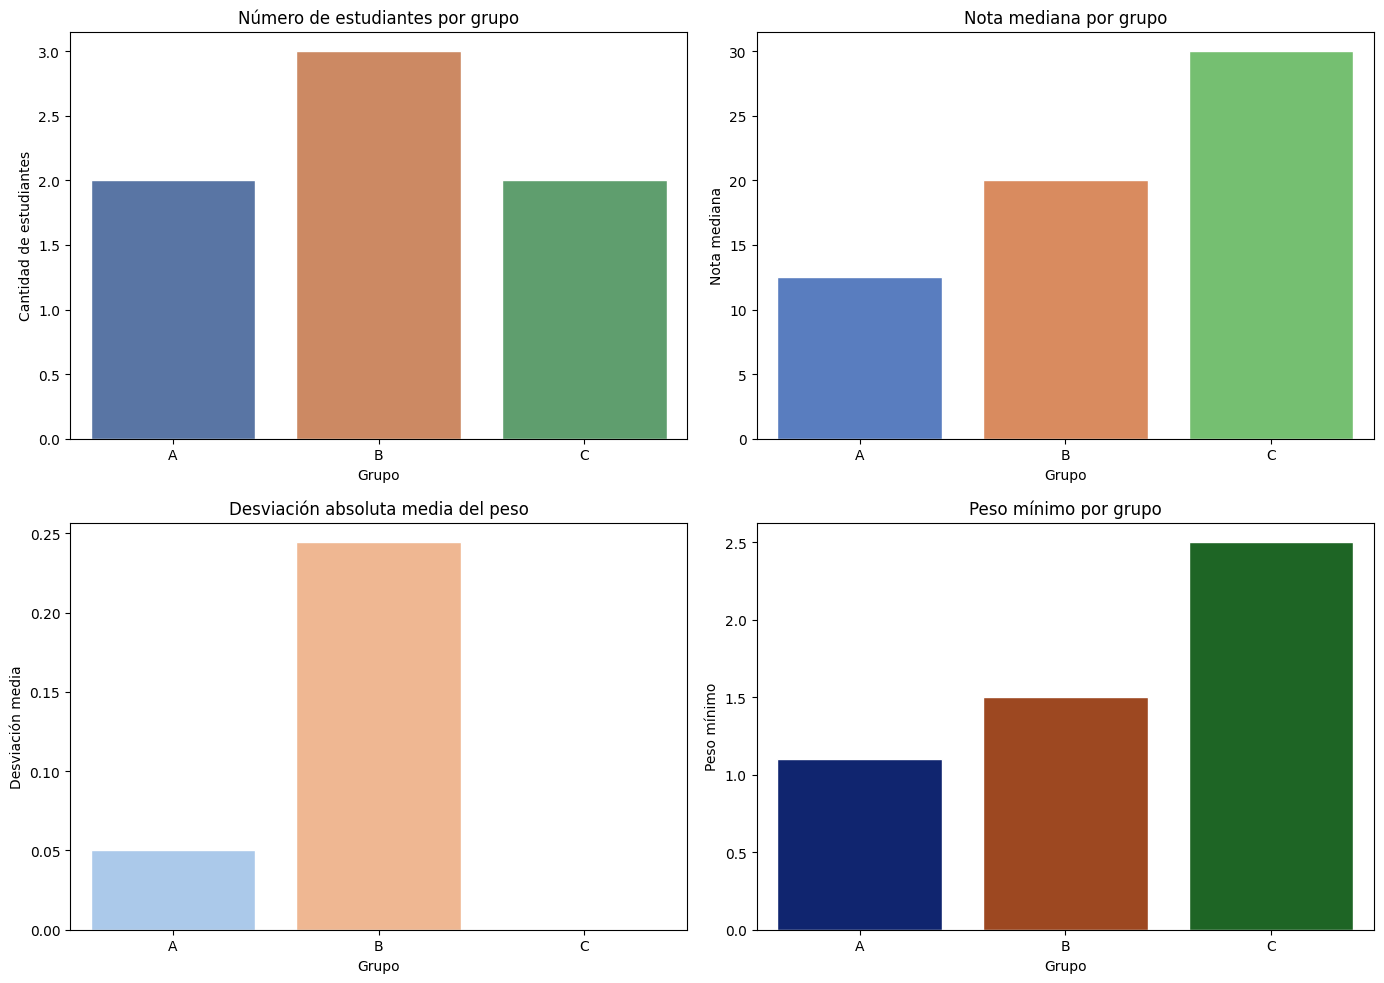

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
# import ace_tools as tools

# Crear el DataFrame original
df = pd.DataFrame({
    'Grupo': ['A', 'A', 'B', 'B', 'B', 'C', 'C'],
    'Valor': [10, 15, 10, 20, 25, 30, 30],
    'Peso': [1.1, 1.2, 1.5, 2.0, 2.1, 2.5, 2.5]
})

# Agrupación y estadísticas
resultado = df.groupby('Grupo').agg(
    valor_count=('Valor', 'count'),
    valor_median=('Valor', 'median'),
    peso_desv_abs=('Peso', lambda x: (x - x.mean()).abs().mean()),
    valor_minimo=('Peso', 'min'),
    tipo=('Peso', 'all')
).reset_index()

# Gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set(style="whitegrid")

# Gráfico 1: Conteo de alumnos por grupo
sns.barplot(x='Grupo', y='valor_count', hue='Grupo', data=resultado, palette='deep', ax=axs[0, 0])
axs[0, 0].set_title('Número de estudiantes por grupo')
axs[0, 0].set_ylabel('Cantidad de estudiantes')

# Gráfico 2: Mediana de valor por grupo
sns.barplot(x='Grupo', y='valor_median', hue='Grupo', data=resultado, palette='muted', ax=axs[0, 1])
axs[0, 1].set_title('Nota mediana por grupo')
axs[0, 1].set_ylabel('Nota mediana')

# Gráfico 3: Desviación absoluta media del peso
sns.barplot(x='Grupo', y='peso_desv_abs', hue='Grupo', data=resultado, palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Desviación absoluta media del peso')
axs[1, 0].set_ylabel('Desviación media')

# Gráfico 4: Peso mínimo
sns.barplot(x='Grupo', y='valor_minimo', hue='Grupo', data=resultado, palette='dark', ax=axs[1, 1])
axs[1, 1].set_title('Peso mínimo por grupo')
axs[1, 1].set_ylabel('Peso mínimo')

plt.tight_layout()
plt.show()